In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats 

In [4]:
data=pd.read_csv('HR_comma_sep.csv')
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [34]:
dp_indices=data.groupby('sales').indices
dp_keys=list(dp_indices.keys())

In [18]:
sales_number=data['left'].iloc[dp_indices['sales']].values
technical_number=data['left'].iloc[dp_indices['technical']].values

In [49]:
dp_number_matrix=pd.DataFrame(np.zeros([len(dp_keys),len(dp_keys)]),index=dp_keys,columns=dp_keys)
for i in range(len(dp_keys)):
    for j in range(len(dp_keys)):
        t_test_value=stats.ttest_ind(data['left'].iloc[dp_indices[dp_keys[i]]],data['left'].iloc[dp_indices[dp_keys[j]]])
        #print(t_test_value[1])
        if t_test_value[1]<0.05:
            dp_number_matrix[dp_number_matrix.index[j]].iloc[i]=-1
        else:
            dp_number_matrix[dp_number_matrix.index[j]].iloc[i]=t_test_value[1]

In [50]:
dp_number_matrix

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
IT,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.450492,0.869976,0.106031,0.080795,-1.000000
RandD,-1.000000,1.000000,-1.000000,-1.000000,0.625897,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
accounting,-1.000000,-1.000000,1.000000,0.280146,-1.000000,0.172672,-1.000000,0.215342,0.351158,0.587121
hr,-1.000000,-1.000000,0.280146,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.057779
management,-1.000000,0.625897,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
marketing,0.450492,-1.000000,0.172672,-1.000000,-1.000000,1.000000,0.393319,0.604918,0.473703,0.247477
product_mng,0.869976,-1.000000,-1.000000,-1.000000,-1.000000,0.393319,1.000000,0.105566,0.080540,-1.000000
sales,0.106031,-1.000000,0.215342,-1.000000,-1.000000,0.604918,0.105566,1.000000,0.719699,0.289107
support,0.080795,-1.000000,0.351158,-1.000000,-1.000000,0.473703,0.080540,0.719699,1.000000,0.558987
technical,-1.000000,-1.000000,0.587121,0.057779,-1.000000,0.247477,-1.000000,0.289107,0.558987,1.000000


In [53]:
dp_number_matrix

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
IT,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.450492,0.869976,0.106031,0.080795,-1.000000
RandD,-1.000000,1.000000,-1.000000,-1.000000,0.625897,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
accounting,-1.000000,-1.000000,1.000000,0.280146,-1.000000,0.172672,-1.000000,0.215342,0.351158,0.587121
hr,-1.000000,-1.000000,0.280146,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.057779
management,-1.000000,0.625897,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
marketing,0.450492,-1.000000,0.172672,-1.000000,-1.000000,1.000000,0.393319,0.604918,0.473703,0.247477
product_mng,0.869976,-1.000000,-1.000000,-1.000000,-1.000000,0.393319,1.000000,0.105566,0.080540,-1.000000
sales,0.106031,-1.000000,0.215342,-1.000000,-1.000000,0.604918,0.105566,1.000000,0.719699,0.289107
support,0.080795,-1.000000,0.351158,-1.000000,-1.000000,0.473703,0.080540,0.719699,1.000000,0.558987
technical,-1.000000,-1.000000,0.587121,0.057779,-1.000000,0.247477,-1.000000,0.289107,0.558987,1.000000


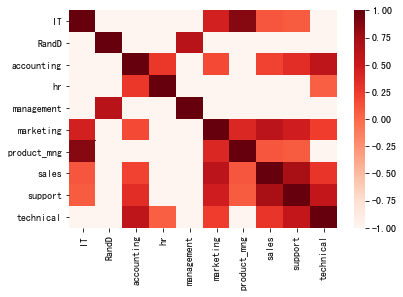

In [55]:
sns.heatmap(dp_number_matrix,xticklabels=dp_keys,yticklabels=dp_keys,cmap='Reds')

In [56]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [63]:
piv_tab=pd.pivot_table(data,values='left',index=['promotion_last_5years','salary'],columns=['Work_accident'],aggfunc=np.mean)
piv_tab

Work_accident                        0         1
promotion_last_5years salary                    
0                     high    0.082996  0.000000
                      low     0.331728  0.090020
                      medium  0.230683  0.081655
1                     high    0.000000  0.000000
                      low     0.229167  0.166667
                      medium  0.028986  0.023256

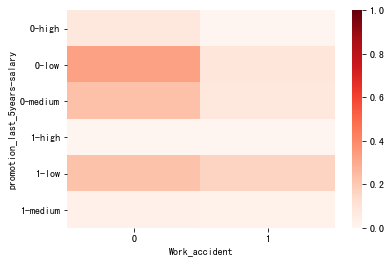

In [67]:
sns.heatmap(piv_tab,vmin=0,vmax=1,cmap='Reds')
sns.set_context(font_scale=2)

# Gini系数

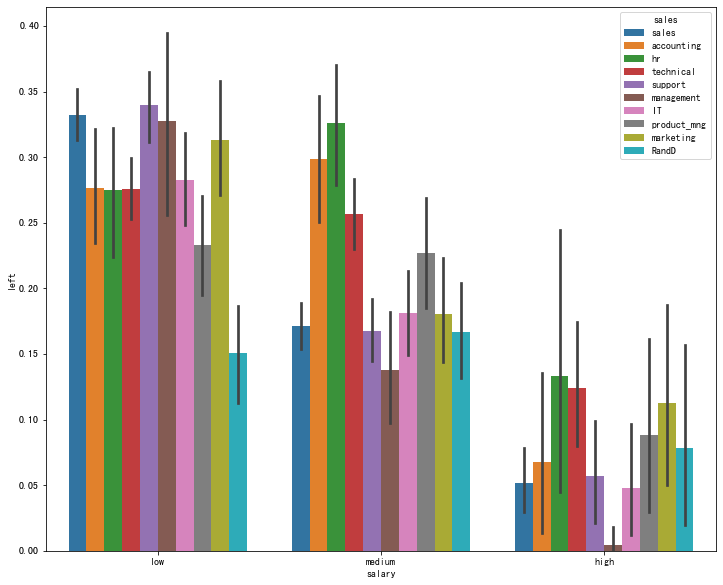

In [71]:
plt.figure(figsize=(12,10))
sns.barplot(x='salary',y='left',hue='sales',data=data)

KeyboardInterrupt: 

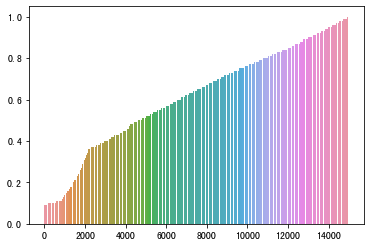

In [108]:
sl_v=data['satisfaction_level']
len_sl_v=list(range(len(sl_v)))
sl_vsl_v_value=sl_v.sort_values()

sns.barplot(len_sl_v,sl_vsl_v_value)

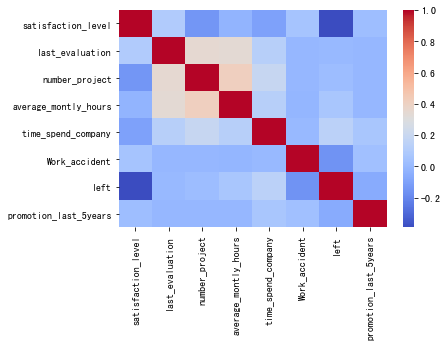

In [111]:
sns.heatmap(data.corr(),cmap='coolwarm')

# 离散数据（熵）

In [113]:
s1=pd.Series(['X1','X1','X2','X2','X2','X2'])
s2=pd.Series(['Y1','Y1','Y1','Y2','Y2','Y2'])

def get_entropy(s):
    prt_ary=s.groupby(s).count().values/float(len(s))
    return -(np.log2(prt_ary)*prt_ary).sum()

print(get_entropy(s1))

0.9182958340544896


In [166]:
def get_condition_entropy(s1,s2):
    d=dict()
    result=list()
    for i in range(len(s1)):
        d[s1[i]]=d.get(s1[i],[])+[s2[i]]
    
    for j in d:
        values=pd.Series(d[j])
        entropy=get_entropy(values)*len(d[j])/len(s1)
        result.append(entropy)
    
    total_entropy=np.sum(result)
    return total_entropy
        
    

get_condition_entropy(s1,s2)

0.5408520829727552

In [168]:
print(get_condition_entropy(s1,s2))
print(get_condition_entropy(s2,s1))

0.5408520829727552
0.4591479170272448


In [171]:
def get_entropy_gain_ratio(s1,s2):
    ratio=get_condition_entropy(s1,s2)/get_entropy(s2)
    return ratio

    
get_entropy_gain_ratio(s1,s2)

0.5408520829727552

In [172]:
def get_discrete_corr(s1,s2):
    discrete_corr=get_entropy_gain_ratio(s1,s2)/np.sqrt(get_entropy(s1)*get_entropy(s2))
    return discrete_corr

get_discrete_corr(s1,s2)

0.5644002527743065

In [175]:
def Gini_ratio(s):
    prt_ary=s.groupby(s).count().values/float(len(s))
    Gini_ratio=np.sum(prt_ary**2)
    return Gini_ratio

def Gini_coef(s1,s2):
    d=dict()
    result=list()
    for i in range(len(s1)):
        d[s1[i]]=d.get(s1[i],[])+[s2[i]]
    
    for j in d:
        values=pd.Series(d[j])
        gini=Gini_ratio(values)*len(d[j])/len(s1)
        result.append(gini)
        ratio=1-np.sum(result)
        return ratio
    
Gini_coef(s1,s2)    

0.6666666666666667

In [198]:
x1=pd.Series(np.arange(0,100,1))
y1=pd.Series(np.random.randint(100,1000,100))
data_set=pd.Series([x,y] for x,y in zip(x1,y1))
data_set
# for i in data_set:
#     Gini_coef(i[0],i[1])    

0      [0, 967]
1      [1, 571]
2      [2, 264]
3      [3, 388]
4      [4, 660]
        ...    
95    [95, 561]
96    [96, 527]
97    [97, 672]
98    [98, 931]
99    [99, 963]
Length: 100, dtype: object

In [190]:
data_set

137     0
320     1
887     2
901     3
392     4
       ..
585    95
586    96
257    97
430    98
912    99
Length: 100, dtype: int64

In [199]:
data1=pd.Series(['男','女','男','女','男'])
data2=pd.Series(['高','高','低','高','低'])
Gini_coef(data1,data2)  

0.6666666666666666

In [200]:
data1=pd.Series(['男','女','男','女','男'])
data2=pd.Series(['高','高','低','高','低'])
data3=pd.Series(['高','低','高','低','高'])
Gini_coef(data1,data3)  

0.4